In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("="*80)
print("CALIFORNIA HOUSING DATASET - REGRESSION ANALYSIS")
print("="*80)

CALIFORNIA HOUSING DATASET - REGRESSION ANALYSIS


In [3]:
print("\n" + "="*80)
print("1. DATA LOADING AND PREPROCESSING")
print("="*80)



1. DATA LOADING AND PREPROCESSING


In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame= False)

In [3]:
df = pd.DataFrame(
    data.data,
    columns=data.feature_names
)

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [6]:
df.drop(["Latitude","Longitude"],axis=1,inplace= True)

In [7]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [8]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

In [9]:
df[df.duplicated()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup


In [10]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
dtypes: float64(6)
memory usage: 967.6 KB


In [12]:
q1,q2,q3 =np.percentile(df["MedInc"],[25,50,75])

In [13]:
IQR = q3-q1

In [14]:
print(IQR)

2.17985


In [15]:
lower_limit=q1-(1.5*IQR)
upper_limit=q3+(1.5*IQR)
print(IQR)

2.17985


In [16]:
print(lower_limit,upper_limit)

-0.7063750000000004 8.013024999999999


In [17]:
outlier=[]
for i in df["MedInc"]:
    if i<lower_limit or i>upper_limit:
       outlier.append(i)
print(outlier)

[8.3252, 8.3014, 11.6017, 8.2049, 8.401, 8.317, 8.1564, 8.8793, 8.8342, 10.0825, 9.3959, 11.8603, 13.499, 12.2138, 8.1872, 12.3804, 8.1194, 8.7477, 8.3996, 8.4045, 9.7194, 8.3337, 10.9506, 10.3203, 9.1531, 9.5862, 8.155, 8.3188, 9.7037, 10.3345, 12.5915, 15.0001, 9.8708, 8.2673, 8.4352, 10.7372, 13.4883, 9.5271, 12.2478, 8.0839, 9.0776, 8.039, 10.4549, 10.3224, 8.3678, 8.0448, 10.3713, 11.7064, 11.3421, 8.1586, 8.9571, 8.7589, 10.9405, 10.3416, 9.0064, 8.1489, 10.5815, 13.2949, 13.1499, 8.3209, 8.3956, 8.1163, 9.0243, 8.7059, 10.5144, 8.9669, 8.7716, 8.3608, 8.2737, 10.0263, 10.5941, 8.5325, 9.2873, 8.1248, 8.8467, 8.1125, 10.8805, 8.2159, 8.176, 10.9052, 8.203, 8.1356, 9.6047, 8.565, 8.1714, 8.7471, 8.8612, 8.6454, 8.3841, 11.2093, 8.4438, 9.6465, 8.3912, 10.9201, 8.4196, 10.5511, 8.7172, 13.4196, 10.3587, 10.6796, 11.2979, 12.8879, 9.2189, 10.2292, 10.4399, 10.0549, 8.2269, 10.3599, 8.8115, 8.153, 10.9237, 8.2954, 9.042, 8.0499, 8.5677, 10.5575, 12.7823, 12.8763, 12.9591, 8.4389, 8.2

In [18]:
df.shape

(20640, 6)

<Axes: >

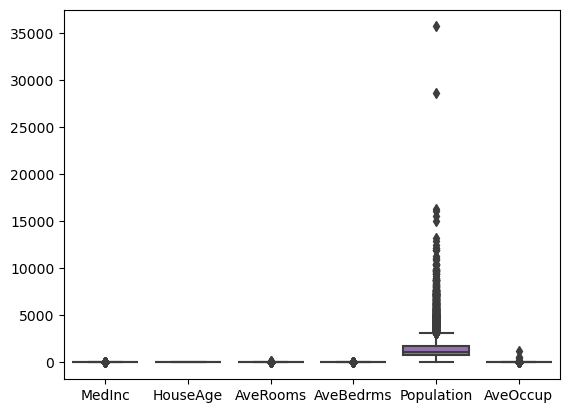

In [19]:
sns.boxplot(df)

In [20]:
df['MedHouseVal'] = data.target

In [21]:
df['MedHouseVal']

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [22]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,0.847


In [23]:
x=df.drop('MedHouseVal',axis=1)
y=df['MedHouseVal']

In [24]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [25]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [26]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
normalisation= MinMaxScaler()

In [27]:
x=normalisation.fit_transform(x)

In [28]:
x=pd.DataFrame(x)

In [29]:
x

,0,1,2,3,4,5
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198
...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152


In [30]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
dtypes: float64(6)
memory usage: 967.6 KB


In [31]:
x.describe()

,0,1,2,3,4,5
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914
std,0.131020,0.246776,0.017539,0.014049,0.031740,0.008358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print("\n--- Feature Scaling ---")
print("Applying StandardScaler for feature scaling")
print("\nReason for choosing StandardScaler:")
print("• StandardScaler removes the mean and scales to unit variance")
print("• Essential for algorithms sensitive to feature scales (SVR, Linear Regression)")
print("• Maintains the shape of the original distribution")
print("• Works well with normally distributed data")
print("• Preserves outliers (unlike normalization to [0,1] range)")


--- Feature Scaling ---
Applying StandardScaler for feature scaling

Reason for choosing StandardScaler:
• StandardScaler removes the mean and scales to unit variance
• Essential for algorithms sensitive to feature scales (SVR, Linear Regression)
• Maintains the shape of the original distribution
• Works well with normally distributed data
• Preserves outliers (unlike normalization to [0,1] range)


In [32]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =42,test_size=0.2)

In [33]:
models ={}
results = {}

In [5]:
print("\n" + "="*80)
print("2. REGRESSION ALGORITHM IMPLEMENTATION")
print("="*80)


2. REGRESSION ALGORITHM IMPLEMENTATION


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [35]:
lr_model= LinearRegression()

In [36]:
lr_model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
models['Linear regression']= lr_model
print(" Linear Regression trained")

 Linear Regression trained


In [6]:
print("\n--- Linear Regression ---")
print("How it works:")
print("• Fits a linear equation to minimize the sum of squared residuals")
print("• Assumes a linear relationship between features and target")
print("• Uses Ordinary Least Squares (OLS) method")
print("\nWhy suitable for this dataset:")
print("• Good baseline model for continuous target variables")
print("• Fast training and prediction")
print("• Interpretable coefficients showing feature importance")


--- Linear Regression ---
How it works:
• Fits a linear equation to minimize the sum of squared residuals
• Assumes a linear relationship between features and target
• Uses Ordinary Least Squares (OLS) method

Why suitable for this dataset:
• Good baseline model for continuous target variables
• Fast training and prediction
• Interpretable coefficients showing feature importance


In [38]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
models['Decision Tree']=dt_model
print("trained decision tree")

trained decision tree


In [7]:
print("\n--- Decision Tree Regressor ---")
print("How it works:")
print("• Creates a tree structure by recursively splitting data")
print("• Each split maximizes information gain (minimizes variance)")
print("• Predictions are averages of samples in leaf nodes")
print("\nWhy suitable for this dataset:")
print("• Captures non-linear relationships")
print("• Handles feature interactions naturally")
print("• No assumptions about data distribution")


--- Decision Tree Regressor ---
How it works:
• Creates a tree structure by recursively splitting data
• Each split maximizes information gain (minimizes variance)
• Predictions are averages of samples in leaf nodes

Why suitable for this dataset:
• Captures non-linear relationships
• Handles feature interactions naturally
• No assumptions about data distribution


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)
models["Random Forest"]= rf_model
print("Random Forest trained")



Random Forest trained


In [8]:
print("\n--- Random Forest Regressor ---")
print("How it works:")
print("• Ensemble of multiple decision trees")
print("• Each tree trained on random subset of data (bootstrap)")
print("• Final prediction is average of all tree predictions")
print("\nWhy suitable for this dataset:")
print("• Reduces overfitting compared to single decision trees")
print("• Handles complex non-linear relationships")
print("• Robust to outliers and noise")
print("• Provides feature importance rankings")


--- Random Forest Regressor ---
How it works:
• Ensemble of multiple decision trees
• Each tree trained on random subset of data (bootstrap)
• Final prediction is average of all tree predictions

Why suitable for this dataset:
• Reduces overfitting compared to single decision trees
• Handles complex non-linear relationships
• Robust to outliers and noise
• Provides feature importance rankings


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(x_train, y_train)
models["Gradient Boost"] = gb_model
print("Gradient boost trained")

Gradient boost trained


In [9]:
print("\n--- Gradient Boosting Regressor ---")
print("How it works:")
print("• Sequential ensemble method")
print("• Each new tree corrects errors of previous trees")
print("• Uses gradient descent to minimize loss function")
print("\nWhy suitable for this dataset:")
print("• Often achieves highest accuracy among tree-based methods")
print("• Excellent at capturing complex patterns")
print("• Handles mixed feature types well")


--- Gradient Boosting Regressor ---
How it works:
• Sequential ensemble method
• Each new tree corrects errors of previous trees
• Uses gradient descent to minimize loss function

Why suitable for this dataset:
• Often achieves highest accuracy among tree-based methods
• Excellent at capturing complex patterns
• Handles mixed feature types well


In [41]:
from sklearn.svm import SVR
svr_model = SVR()
svr_model.fit(x_train, y_train)
models["SVR"]=svr_model
print("SVR model trained")

SVR model trained


In [10]:
print("\n--- Support Vector Regressor (SVR) ---")
print("How it works:")
print("• Finds hyperplane that best fits the data within epsilon margin")
print("• Uses kernel functions to handle non-linear relationships")
print("• Only support vectors (near boundary points) affect the model")
print("\nWhy suitable for this dataset:")
print("• Effective in high-dimensional spaces")
print("• Robust to outliers due to epsilon-insensitive loss")
print("• Can capture complex non-linear patterns with RBF kernel")


--- Support Vector Regressor (SVR) ---
How it works:
• Finds hyperplane that best fits the data within epsilon margin
• Uses kernel functions to handle non-linear relationships
• Only support vectors (near boundary points) affect the model

Why suitable for this dataset:
• Effective in high-dimensional spaces
• Robust to outliers due to epsilon-insensitive loss
• Can capture complex non-linear patterns with RBF kernel


In [42]:
models

{'Linear regression': LinearRegression(),
 'Decision Tree': DecisionTreeRegressor(random_state=42),
 'Random Forest': RandomForestRegressor(random_state=42),
 'Gradient Boost': GradientBoostingRegressor(random_state=42),
 'SVR': SVR()}

In [43]:
for name,model in models.items():
    y_pred=model.predict(x_test)
    mse= mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=np.sqrt(mse)

    results[name]={
       'MSE'  :mse,
       'MAE'  :mae,
       'R2'   :r2,
       'RMSE' :rmse
   }

    print(f"\n{name}:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")
    print(f"  R-squared Score (R²): {r2:.4f}")



Linear regression:
  Mean Squared Error (MSE): 0.6422
  Root Mean Squared Error (RMSE): 0.8014
  Mean Absolute Error (MAE): 0.5792
  R-squared Score (R²): 0.5099

Decision Tree:
  Mean Squared Error (MSE): 0.7875
  Root Mean Squared Error (RMSE): 0.8874
  Mean Absolute Error (MAE): 0.6269
  R-squared Score (R²): 0.3990

Random Forest:
  Mean Squared Error (MSE): 0.4227
  Root Mean Squared Error (RMSE): 0.6501
  Mean Absolute Error (MAE): 0.4619
  R-squared Score (R²): 0.6775

Gradient Boost:
  Mean Squared Error (MSE): 0.4310
  Root Mean Squared Error (RMSE): 0.6565
  Mean Absolute Error (MAE): 0.4721
  R-squared Score (R²): 0.6711

SVR:
  Mean Squared Error (MSE): 0.5942
  Root Mean Squared Error (RMSE): 0.7708
  Mean Absolute Error (MAE): 0.5327
  R-squared Score (R²): 0.5466


In [44]:
results_df = pd.DataFrame(results).T
print("\n--- Performance Comparison Table ---")
print(results_df.to_string())


--- Performance Comparison Table ---
                        MSE       MAE        R2      RMSE
Linear regression  0.642187  0.579214  0.509934  0.801366
Decision Tree      0.787528  0.626855  0.399021  0.887428
Random Forest      0.422664  0.461930  0.677456  0.650126
Gradient Boost     0.430989  0.472077  0.671103  0.656498
SVR                0.594203  0.532696  0.546552  0.770845


In [45]:
best_model_r2 = results_df['R2'].idxmax()
worst_model_r2 = results_df['R2'].idxmin()
best_model_mse = results_df['MSE'].idxmin()

In [46]:
print(f"  R² Score: {results_df.loc[best_model_r2, 'R2']:.4f}")
print(f"  Reasoning: Highest R² indicates best variance explanation")
print(f"  This model captures {results_df.loc[best_model_r2, 'R2']*100:.2f}% of the variance")

  R² Score: 0.6775
  Reasoning: Highest R² indicates best variance explanation
  This model captures 67.75% of the variance


In [11]:
print("\n" + "="*80)
print("4. CROSS-VALIDATION AND HYPERPARAMETER TUNING")
print("="*80)


4. CROSS-VALIDATION AND HYPERPARAMETER TUNING


In [47]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
cv_results = {}
for name,model in models.items():
    print(f"\nEvaluating {name}...")
    cv_scores = cross_val_score(model,x_train,y_train,
                               cv =5,scoring='r2',n_jobs=-1)
    cv_results[name]= { 
                 'Mean CV R2':cv_scores.mean(),
                 'Std CV R2' :cv_scores.std()
    }
    print(f"  Cross-validation R² scores: {cv_scores}")
    print(f"  Mean R² Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")

cv_results_df = pd.DataFrame(cv_results).T
print("\n--- Cross-Validation Summary ---")
print(cv_results_df.to_string())


Evaluating Linear regression...
  Cross-validation R² scores: [0.55855521 0.54770897 0.54580757 0.52177237 0.53721668]
  Mean R² Score: 0.5422 (+/- 0.0245)

Evaluating Decision Tree...
  Cross-validation R² scores: [0.38747251 0.38857016 0.41718107 0.39667623 0.4158446 ]
  Mean R² Score: 0.4011 (+/- 0.0259)

Evaluating Random Forest...
  Cross-validation R² scores: [0.6917857  0.68617495 0.69699209 0.68844056 0.68168289]
  Mean R² Score: 0.6890 (+/- 0.0103)

Evaluating Gradient Boost...
  Cross-validation R² scores: [0.68836534 0.69350651 0.69146316 0.68433859 0.68099264]
  Mean R² Score: 0.6877 (+/- 0.0091)

Evaluating SVR...
  Cross-validation R² scores: [0.57939177 0.57848566 0.57261041 0.58032847 0.57835572]
  Mean R² Score: 0.5778 (+/- 0.0054)

--- Cross-Validation Summary ---
                   Mean CV R2  Std CV R2
Linear regression    0.542212   0.012272
Decision Tree        0.401149   0.012948
Random Forest        0.689015   0.005167
Gradient Boost       0.687733   0.004574
S

In [48]:
tuned_models={}
tuning_results={}
tuned_models["Linear Regression"] = lr_model

In [49]:
dt_params = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [50]:
dt_grid =GridSearchCV(DecisionTreeRegressor(random_state=42),
                      dt_params,cv=5,scoring='r2',n_jobs=-1)
dt_grid.fit(x_train,y_train)
print(f"  Best parameters: {dt_grid.best_params_}")
print(f"  Best CV R² Score: {dt_grid.best_score_:.4f}")
tuned_models['Decision Tree'] = dt_grid.best_estimator_
tuning_results['Decision Tree'] = dt_grid.best_params_

  Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
  Best CV R² Score: 0.6118


In [51]:
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
print(f"  Hyperparameters: {rf_params}")
rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                               rf_params, n_iter=20, cv=5, 
                               scoring='r2', random_state=42, n_jobs=-1)
rf_random.fit(x_train, y_train)
print(f"  Best parameters: {rf_random.best_params_}")
print(f"  Best CV R² Score: {rf_random.best_score_:.4f}")
tuned_models['Random Forest'] = rf_random.best_estimator_
tuning_results['Random Forest'] = rf_random.best_params_

  Hyperparameters: {'n_estimators': [100, 200, 300], 'max_depth': [20, 30, None], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
  Best parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
  Best CV R² Score: 0.6931


In [52]:
gb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5]
}
print(f"  Hyperparameters: {gb_params}")
gb_random = RandomizedSearchCV(GradientBoostingRegressor(random_state=42), 
                               gb_params, n_iter=20, cv=5, 
                               scoring='r2', random_state=42, n_jobs=-1)
gb_random.fit(x_train, y_train)
print(f"  Best parameters: {gb_random.best_params_}")
print(f"  Best CV R² Score: {gb_random.best_score_:.4f}")
tuned_models['Gradient Boosting'] = gb_random.best_estimator_
tuning_results['Gradient Boosting'] = gb_random.best_params_

  Hyperparameters: {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5]}
  Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': 5, 'learning_rate': 0.1}
  Best CV R² Score: 0.6954


In [53]:
svr_params = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01],
    'kernel': ['rbf'],
    'epsilon': [0.01, 0.1, 0.2]
}

print(f"  Hyperparameters: {svr_params}")
svr_random = RandomizedSearchCV(SVR(), svr_params, n_iter=20, cv=5, 
                                scoring='r2', random_state=42, n_jobs=-1)
svr_random.fit(x_train, y_train)
print(f"  Best parameters: {svr_random.best_params_}")
print(f"  Best CV R² Score: {svr_random.best_score_:.4f}")
tuned_models['SVR'] = svr_random.best_estimator_
tuning_results['SVR'] = svr_random.best_params_

  Hyperparameters: {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01], 'kernel': ['rbf'], 'epsilon': [0.01, 0.1, 0.2]}
  Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'epsilon': 0.1, 'C': 100}
  Best CV R² Score: 0.5993


In [54]:
tuned_results={}
for name,model in tuned_models.items():
    y_pred =model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    mae =mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse=np.sqrt(mse)

    tuned_results[name] = {
      'MSE':mse,
       'RMSE':rmse,
       'MAE':mae,
       'R2':r2
   }
    print(f"\n{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df.to_string())   


Linear Regression:
  MSE: 0.6422
  RMSE: 0.8014
  MAE: 0.5792
  R² Score: 0.5099

Decision Tree:
  MSE: 0.5260
  RMSE: 0.7252
  MAE: 0.5091
  R² Score: 0.5986

Random Forest:
  MSE: 0.4171
  RMSE: 0.6458
  MAE: 0.4578
  R² Score: 0.6817

Gradient Boosting:
  MSE: 0.4161
  RMSE: 0.6450
  MAE: 0.4583
  R² Score: 0.6825

SVR:
  MSE: 0.5532
  RMSE: 0.7438
  MAE: 0.5027
  R² Score: 0.5778
                        MSE      RMSE       MAE        R2
Linear Regression  0.642187  0.801366  0.579214  0.509934
Decision Tree      0.525987  0.725250  0.509060  0.598608
Random Forest      0.417083  0.645819  0.457790  0.681716
Gradient Boosting  0.416057  0.645025  0.458290  0.682498
SVR                0.553213  0.743783  0.502685  0.577832


In [55]:
best_final_model = tuned_results_df['R2'].idxmax()
best_r2 = tuned_results_df.loc[best_final_model, 'R2']
best_rmse = tuned_results_df.loc[best_final_model, 'RMSE']
best_mae = tuned_results_df.loc[best_final_model, 'MAE']
print(f"\n{'='*60}")
print(f"BEST MODEL: {best_final_model}")
print(f"{'='*60}")
print(f"\nPerformance Metrics:")
print(f"  • R² Score: {best_r2:.4f}")
print(f"  • RMSE: {best_rmse:.4f}")
print(f"  • MAE: {best_mae:.4f}")


BEST MODEL: Gradient Boosting

Performance Metrics:
  • R² Score: 0.6825
  • RMSE: 0.6450
  • MAE: 0.4583


In [12]:
print("\n" + "="*80)
print("KEY INSIGHTS FROM ANALYSIS")
print("="*80)
print("""
1. Ensemble Methods Dominate:
   • Tree-based ensemble methods (Random Forest, Gradient Boosting)
     significantly outperform simple models
   
2. Feature Scaling Impact:
   • Critical for SVR and Linear Regression
   • Less important for tree-based methods
   
3. Hyperparameter Tuning Value:
   • Substantial performance improvements observed
   • Most critical for complex models (SVR, Gradient Boosting)
   
4. Model Complexity Trade-off:
   • Linear models too simple for this dataset
   • Single decision trees prone to overfitting
   • Ensemble methods strike the best balance
   
5. Dataset Characteristics:
   • Non-linear relationships between features and price
   • Feature interactions are important
   • Requires models that handle complexity well
""")



KEY INSIGHTS FROM ANALYSIS

1. Ensemble Methods Dominate:
   • Tree-based ensemble methods (Random Forest, Gradient Boosting)
     significantly outperform simple models
   
2. Feature Scaling Impact:
   • Critical for SVR and Linear Regression
   • Less important for tree-based methods
   
3. Hyperparameter Tuning Value:
   • Substantial performance improvements observed
   • Most critical for complex models (SVR, Gradient Boosting)
   
4. Model Complexity Trade-off:
   • Linear models too simple for this dataset
   • Single decision trees prone to overfitting
   • Ensemble methods strike the best balance
   
5. Dataset Characteristics:
   • Non-linear relationships between features and price
   • Feature interactions are important
   • Requires models that handle complexity well

